In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [48]:
data = pd.read_csv('AAPL.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1334 non-null   object 
 1   Open       1334 non-null   float64
 2   High       1334 non-null   float64
 3   Low        1334 non-null   float64
 4   Close      1334 non-null   float64
 5   Adj Close  1334 non-null   float64
 6   Volume     1334 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 73.1+ KB


In [50]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03
mean,56.043855,56.658581,55.436396,56.077354,54.917730,1.320805e+08
std,30.950365,31.382609,30.424570,30.920462,31.418789,6.047119e+07
min,22.500000,22.917500,22.367500,22.584999,21.134403,4.544800e+07
25%,35.983750,36.189999,35.795624,35.958125,34.229350,9.196742e+07
50%,45.076250,45.632500,44.608750,45.111250,44.113291,1.146796e+08
75%,65.937500,66.829375,65.470627,66.325623,65.659618,1.535931e+08
max,143.600006,145.089996,141.369995,143.160004,142.946396,5.334788e+08


In [51]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.364536,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.753977,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.289116,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.306208,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.424154,283192000


In [52]:
data.drop('Adj Close', axis = 1, inplace=True)

In [53]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,283192000


In [54]:
trainData = data.iloc[:,4:5].values

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [56]:
trainData.shape

(1334, 1)

In [57]:
X_train = []
y_train = []

for i in range(60,1334):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [58]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [59]:
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))               
model.add(Dropout(0.2))          
               
model.add(LSTM(units = 100, return_sequences = False))   
model.add(Dropout(0.2))       

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")

In [60]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
40/40 - 3s - loss: 0.0128
Epoch 2/20
40/40 - 3s - loss: 0.0029
Epoch 3/20
40/40 - 3s - loss: 0.0022
Epoch 4/20
40/40 - 3s - loss: 0.0021
Epoch 5/20
40/40 - 3s - loss: 0.0020
Epoch 6/20
40/40 - 3s - loss: 0.0021
Epoch 7/20
40/40 - 3s - loss: 0.0020
Epoch 8/20
40/40 - 3s - loss: 0.0025
Epoch 9/20
40/40 - 3s - loss: 0.0020
Epoch 10/20
40/40 - 3s - loss: 0.0016
Epoch 11/20
40/40 - 3s - loss: 0.0015
Epoch 12/20
40/40 - 3s - loss: 0.0018
Epoch 13/20
40/40 - 3s - loss: 0.0015
Epoch 14/20
40/40 - 3s - loss: 0.0014
Epoch 15/20
40/40 - 3s - loss: 0.0015
Epoch 16/20
40/40 - 3s - loss: 0.0013
Epoch 17/20
40/40 - 3s - loss: 0.0013
Epoch 18/20
40/40 - 3s - loss: 0.0014
Epoch 19/20
40/40 - 3s - loss: 0.0013
Epoch 20/20
40/40 - 3s - loss: 0.0013


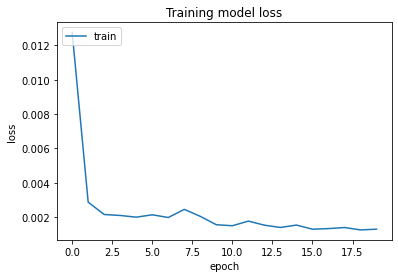

In [61]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc ='upper left')
plt.show()

In [62]:
testData=pd.read_csv('AAPL2.csv')
testData.drop('Adj Close', axis = 1, inplace=True)
testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

inputClosing= testData.iloc[:,0:].values
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape

X_test=[]
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape


(1274, 60, 1)

In [63]:
y_pred = model.predict(X_test)

In [64]:
predicted_price = scaler.inverse_transform(y_pred)

In [65]:
y_pred

array([[0.03297678],
       [0.03357477],
       [0.03427833],
       ...,
       [0.89677876],
       [0.9048115 ],
       [0.9113109 ]], dtype=float32)

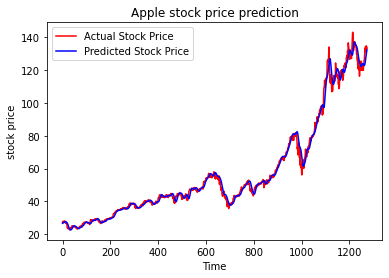

In [66]:
plt.plot(y_test, color = 'red', label = "Actual Stock Price")
plt.plot(predicted_price, color = 'blue', label = "Predicted Stock Price")

plt.title('Apple stock price prediction')
plt.ylabel('stock price')
plt.xlabel('Time')
plt.legend()
plt.show()